# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [26]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mlxtend.evaluate import bias_variance_decomp
from sklearn.model_selection import train_test_split

In [2]:
boston_housing = pd.read_csv('../data/boston_data.csv')
boston_housing.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [3]:
boston_housing.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [4]:
boston_housing.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [5]:
boston_housing.shape

(404, 14)

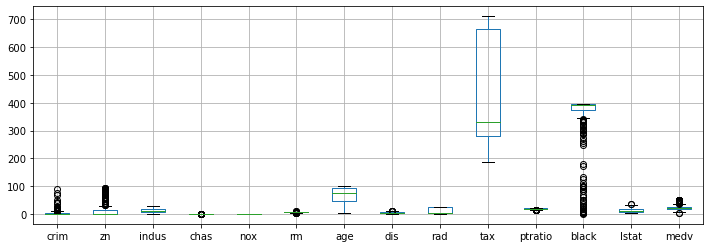

In [6]:
boston_housing.boxplot(figsize=(12,4))
plt.show()

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

**Target**:
>- `medv`median value of owner-occupied homes in usd 10,000

**Features**:
>- `crim` per capita crime rate by town.
>- `zn` proportion of residential land zoned for lots over 25,000 sq.ft.
>- `indus` proportion of non-retail business acres per town.
>- `chas` Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
>- `nox` nitrogen oxides concentration (parts per 10 million).
>- `rm` average number of rooms per dwelling.
>- `age` proportion of owner-occupied units built prior to 1940.
>- `dis` weighted mean of distances to five Boston employment centres.
>- `rad` index of accessibility to radial highways.
>- `tax` full-value property-tax rate per usd 10,000
>- `ptratio` pupil-teacher ratio by town.
>- `black` 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
>- `lstat` lower status of the population (percent).

#### `medv` median value of owner-occupied homes in usd 10,000 vs `rm` average number of rooms per dwelling.

<AxesSubplot:xlabel='rm', ylabel='medv'>

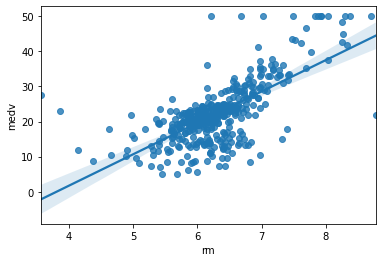

In [7]:
sns.regplot(data = boston_housing, x= 'rm', y ='medv')

#### `medv` median value of owner-occupied homes in usd 10,000 vs `lstat` lower status of the population (percent).

<AxesSubplot:xlabel='lstat', ylabel='medv'>

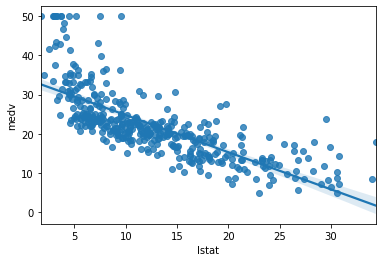

In [8]:
sns.regplot(data = boston_housing, x= 'lstat', y ='medv')

#### `medv` median value of owner-occupied homes in usd 10,000 vs `indus` proportion of non-retail business acres per town.

<AxesSubplot:xlabel='indus', ylabel='medv'>

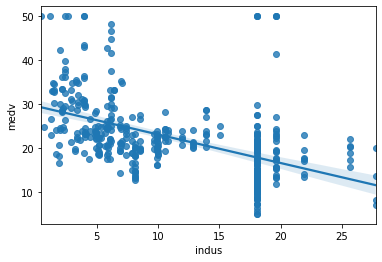

In [9]:
sns.regplot(data = boston_housing, x= 'indus', y ='medv')

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

> `medv` median value of owner-occupied homes has poritive relationshio with `rm` average number of rooms per dwelling; negative relationsip with `lstat` lower status of the population (percent) and some negative relationship with `indus` proportion of non-retail business acres per town, however the `indus` relationship does not seem to be very strong

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<AxesSubplot:>

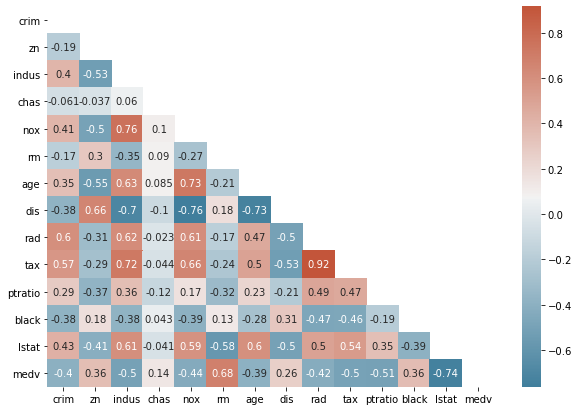

In [10]:
plt.figure(figsize = (10,7))

corr = boston_housing.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, annot = True, mask = mask, cmap = cmap)

>`ptratio` pupil-teacher ratio by town has -0.51 coeefficient of correlation, which is as high, in absolute terms, as `indus` proportion of non-retail business acres per town

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [11]:
boston_housing['medv'].describe().transpose()[['min','max','mean','50%', 'std']]

min      5.000000
max     50.000000
mean    22.312376
50%     21.400000
std      8.837019
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [12]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(boston_housing.iloc[:,:-1],boston_housing.iloc[:,-1], test_size = 0.2, shuffle = True)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
depth = [2, 4, 6, 8, 10]
learning_curves = []
for i in range(100):
    for d in depth:
        RFR = RandomForestRegressor(max_depth = d).fit(X_train, y_train)
        learning_curves.append([
            d,
            performance_metric(y_train, RFR.predict(X_train)), 
            performance_metric(y_test, RFR.predict(X_test))
        ])

In [16]:
df = pd.DataFrame(learning_curves, columns = ['max_depth','train_set_metric', 'test_set_metric'])
df.head()

,max_depth,train_set_metric,test_set_metric
0,2,0.768653,0.657047
1,4,0.908897,0.754105
2,6,0.951299,0.792341
3,8,0.967973,0.811683
4,10,0.973079,0.791663


In [17]:
df = df.groupby('max_depth').mean().reset_index()

Now, plot the score for each tree on the training set and on the testing set.

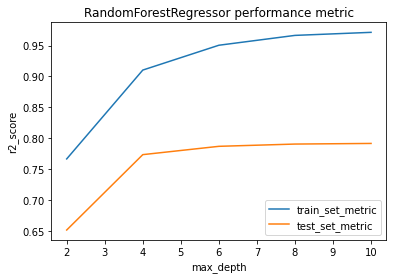

In [18]:
plt.plot(df['max_depth'],df['train_set_metric'], label = "train_set_metric")
plt.plot(df['max_depth'],df['test_set_metric'], label = "test_set_metric")
plt.legend()
plt.title('RandomForestRegressor performance metric')
plt.xlabel('max_depth')
plt.ylabel('r2_score')
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

> **Answer:** Based on results from 100 iterations, increasing depth of the trees improves the r2-score on the test set up until max_depth=6, after the score slightly decreases. Also, increase of the max_depth does not improve the performance gap between training set and test set, and moreover it seems to increased adter max_depth=4

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

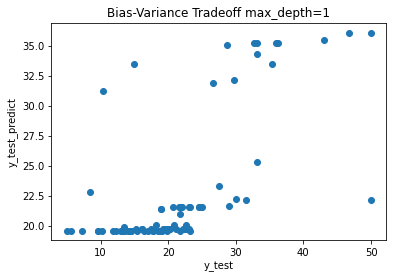

In [19]:
RFR = RandomForestRegressor(max_depth = 1).fit(X_train, y_train)
plt.scatter(y_test, RFR.predict(X_test))
plt.title('Bias-Variance Tradeoff max_depth=1')
plt.xlabel('y_test')
plt.ylabel('y_test_predict')
plt.show()

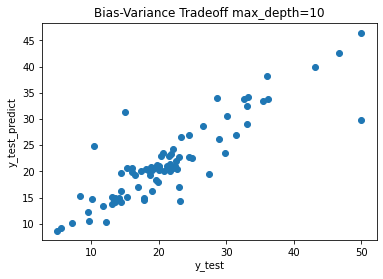

In [20]:
RFR = RandomForestRegressor(max_depth = 10).fit(X_train, y_train)
plt.scatter(y_test, RFR.predict(X_test))
plt.title('Bias-Variance Tradeoff max_depth=10')
plt.xlabel('y_test')
plt.ylabel('y_test_predict')
plt.show()

### https://machinelearningmastery.com/calculate-the-bias-variance-trade-off/

>I would like to use alternative approach base on the tutorial in the link above

In [35]:
from mlxtend.evaluate import bias_variance_decomp
# load dataset

model =  RandomForestRegressor(max_depth = 1)
# estimate bias and variance
mse, bias, var = bias_variance_decomp(
    model, 
    X_train.values, 
    y_train.values, 
    X_test.values, 
    y_test.values, 
    loss='mse', 
    num_rounds=100, 
    random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 48.691
Bias: 44.843
Variance: 3.848


In [36]:
from mlxtend.evaluate import bias_variance_decomp
# load dataset

model =  RandomForestRegressor(max_depth = 10)
# estimate bias and variance
mse, bias, var = bias_variance_decomp(
    model, 
    X_train.values, 
    y_train.values, 
    X_test.values, 
    y_test.values, 
    loss='mse', 
    num_rounds=100, 
    random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 19.125
Bias: 16.001
Variance: 3.124


> **Answer:** Upon visual inspection it seemed that for `max_depth = 1` the model suffered from high variance and high bias. For `max_depth = 10` the bias and variance decreased with higher varibales suffering from higher variance and bias in both models. However running bias variance decomposition with `mlxtend.evaluate.bias_variance_decomp` shows that both models suffer from high bias, but have low variance

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

>**Answer**: max_depth=4 or max_depth=6 is the best option, with max_depth=4 outperforming max_depth=6 based on gap between r2_scores in training and test sets

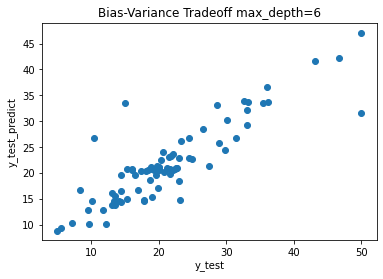

In [21]:
RFR = RandomForestRegressor(max_depth = 6).fit(X_train, y_train)
plt.scatter(y_test, RFR.predict(X_test))
plt.title('Bias-Variance Tradeoff max_depth=6')
plt.xlabel('y_test')
plt.ylabel('y_test_predict')
plt.show()

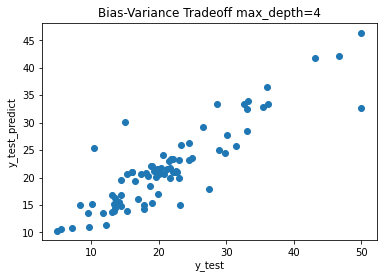

In [22]:
RFR = RandomForestRegressor(max_depth = 4).fit(X_train, y_train)
plt.scatter(y_test, RFR.predict(X_test))
plt.title('Bias-Variance Tradeoff max_depth=4')
plt.xlabel('y_test')
plt.ylabel('y_test_predict')
plt.show()

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

>**Answer:**
> - Data has been collected a while ago, so for better prediction we need more recent data as the prices for housing market have probably grown significantly
> - The model suffers from high variance for different setting of max_depth. Even if variance decreases in general, higher priced suburbs are not predicted very well
> - In general we cannot expand this model to other terriories, such as rural areas, because Boston data is not representative of those. However it is possible that we will get a model that will be constantly underperforming, or high-bias - low variance